## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  91.397820   886.920965  0.549488   5.759642  1.286133
1  27.085569   126.916722  0.164527   1.617330  0.692709
2  77.185744   246.599965  0.483241   7.426713  0.976365
3  68.695418  1355.963848  0.024019  10.428776  0.416284
4  16.829346   465.351919  0.964959   2.870501  1.431782


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9511662	total: 69ms	remaining: 1m 8s
1:	learn: 0.9428633	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9334870	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9255214	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9174674	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9080664	total: 71.9ms	remaining: 11.9s
6:	learn: 0.8977518	total: 72.4ms	remaining: 10.3s
7:	learn: 0.8877080	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8808546	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8722128	total: 73.9ms	remaining: 7.31s
10:	learn: 0.8634706	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8548100	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8477347	total: 75.4ms	remaining: 5.72s
13:	learn: 0.8391537	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8319090	total: 76.1ms	remaining: 5s
15:	learn: 0.8251763	total: 76.7ms	remaining: 4.71s
16:	learn: 0.8155293	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8086744	total: 77.6ms	remaining: 4.23s
18:	learn: 0.8039804	total: 78ms	remaining: 4.03s

108:	learn: 0.3827686	total: 118ms	remaining: 965ms
109:	learn: 0.3801296	total: 119ms	remaining: 960ms
110:	learn: 0.3774883	total: 119ms	remaining: 953ms
111:	learn: 0.3750932	total: 119ms	remaining: 946ms
112:	learn: 0.3722021	total: 120ms	remaining: 940ms
113:	learn: 0.3691683	total: 120ms	remaining: 934ms
114:	learn: 0.3666632	total: 121ms	remaining: 928ms
115:	learn: 0.3642666	total: 121ms	remaining: 923ms
116:	learn: 0.3614214	total: 122ms	remaining: 918ms
117:	learn: 0.3592312	total: 122ms	remaining: 911ms
118:	learn: 0.3567447	total: 122ms	remaining: 906ms
119:	learn: 0.3544847	total: 123ms	remaining: 901ms
120:	learn: 0.3520441	total: 123ms	remaining: 897ms
121:	learn: 0.3496619	total: 124ms	remaining: 892ms
122:	learn: 0.3478343	total: 124ms	remaining: 886ms
123:	learn: 0.3453375	total: 125ms	remaining: 881ms
124:	learn: 0.3430274	total: 125ms	remaining: 876ms
125:	learn: 0.3405391	total: 126ms	remaining: 871ms
126:	learn: 0.3384517	total: 126ms	remaining: 867ms
127:	learn: 

258:	learn: 0.1661391	total: 186ms	remaining: 532ms
259:	learn: 0.1652943	total: 186ms	remaining: 531ms
260:	learn: 0.1643124	total: 187ms	remaining: 529ms
261:	learn: 0.1633758	total: 187ms	remaining: 528ms
262:	learn: 0.1627166	total: 188ms	remaining: 526ms
263:	learn: 0.1618749	total: 188ms	remaining: 525ms
264:	learn: 0.1609836	total: 189ms	remaining: 523ms
265:	learn: 0.1604776	total: 189ms	remaining: 522ms
266:	learn: 0.1597583	total: 190ms	remaining: 520ms
267:	learn: 0.1589354	total: 190ms	remaining: 519ms
268:	learn: 0.1581556	total: 191ms	remaining: 518ms
269:	learn: 0.1575258	total: 191ms	remaining: 517ms
270:	learn: 0.1566830	total: 192ms	remaining: 516ms
271:	learn: 0.1558779	total: 192ms	remaining: 515ms
272:	learn: 0.1551315	total: 193ms	remaining: 513ms
273:	learn: 0.1546401	total: 193ms	remaining: 512ms
274:	learn: 0.1538697	total: 194ms	remaining: 510ms
275:	learn: 0.1534716	total: 194ms	remaining: 508ms
276:	learn: 0.1525101	total: 194ms	remaining: 507ms
277:	learn: 

505:	learn: 0.0678884	total: 301ms	remaining: 294ms
506:	learn: 0.0677053	total: 301ms	remaining: 293ms
507:	learn: 0.0675473	total: 302ms	remaining: 292ms
508:	learn: 0.0672048	total: 302ms	remaining: 292ms
509:	learn: 0.0670802	total: 303ms	remaining: 291ms
510:	learn: 0.0667444	total: 303ms	remaining: 290ms
511:	learn: 0.0664713	total: 303ms	remaining: 289ms
512:	learn: 0.0662979	total: 305ms	remaining: 289ms
513:	learn: 0.0659701	total: 305ms	remaining: 288ms
514:	learn: 0.0658191	total: 305ms	remaining: 288ms
515:	learn: 0.0654982	total: 306ms	remaining: 287ms
516:	learn: 0.0653804	total: 307ms	remaining: 287ms
517:	learn: 0.0650658	total: 308ms	remaining: 286ms
518:	learn: 0.0649503	total: 308ms	remaining: 286ms
519:	learn: 0.0646419	total: 309ms	remaining: 285ms
520:	learn: 0.0643830	total: 309ms	remaining: 284ms
521:	learn: 0.0640799	total: 310ms	remaining: 284ms
522:	learn: 0.0639657	total: 310ms	remaining: 283ms
523:	learn: 0.0638536	total: 311ms	remaining: 282ms
524:	learn: 

652:	learn: 0.0431081	total: 369ms	remaining: 196ms
653:	learn: 0.0428569	total: 369ms	remaining: 195ms
654:	learn: 0.0426104	total: 370ms	remaining: 195ms
655:	learn: 0.0424843	total: 370ms	remaining: 194ms
656:	learn: 0.0422965	total: 371ms	remaining: 194ms
657:	learn: 0.0420552	total: 371ms	remaining: 193ms
658:	learn: 0.0418717	total: 372ms	remaining: 192ms
659:	learn: 0.0417616	total: 372ms	remaining: 192ms
660:	learn: 0.0415248	total: 373ms	remaining: 191ms
661:	learn: 0.0414166	total: 373ms	remaining: 191ms
662:	learn: 0.0411839	total: 374ms	remaining: 190ms
663:	learn: 0.0410127	total: 374ms	remaining: 189ms
664:	learn: 0.0409062	total: 375ms	remaining: 189ms
665:	learn: 0.0408018	total: 375ms	remaining: 188ms
666:	learn: 0.0405742	total: 376ms	remaining: 188ms
667:	learn: 0.0404408	total: 376ms	remaining: 187ms
668:	learn: 0.0403388	total: 377ms	remaining: 186ms
669:	learn: 0.0401733	total: 377ms	remaining: 186ms
670:	learn: 0.0400732	total: 378ms	remaining: 185ms
671:	learn: 

907:	learn: 0.0242130	total: 483ms	remaining: 48.9ms
908:	learn: 0.0242037	total: 483ms	remaining: 48.4ms
909:	learn: 0.0240976	total: 484ms	remaining: 47.8ms
910:	learn: 0.0240916	total: 484ms	remaining: 47.3ms
911:	learn: 0.0240127	total: 485ms	remaining: 46.8ms
912:	learn: 0.0238965	total: 485ms	remaining: 46.2ms
913:	learn: 0.0238872	total: 485ms	remaining: 45.7ms
914:	learn: 0.0238814	total: 486ms	remaining: 45.1ms
915:	learn: 0.0238504	total: 486ms	remaining: 44.6ms
916:	learn: 0.0237370	total: 487ms	remaining: 44ms
917:	learn: 0.0237280	total: 487ms	remaining: 43.5ms
918:	learn: 0.0237223	total: 487ms	remaining: 42.9ms
919:	learn: 0.0236052	total: 488ms	remaining: 42.4ms
920:	learn: 0.0235206	total: 488ms	remaining: 41.9ms
921:	learn: 0.0234375	total: 489ms	remaining: 41.3ms
922:	learn: 0.0233557	total: 489ms	remaining: 40.8ms
923:	learn: 0.0232536	total: 489ms	remaining: 40.2ms
924:	learn: 0.0232390	total: 490ms	remaining: 39.7ms
925:	learn: 0.0231591	total: 490ms	remaining: 39

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


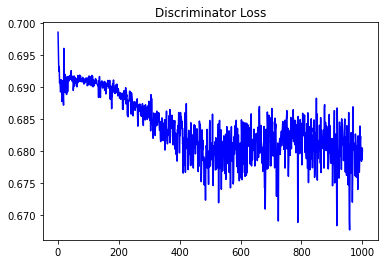

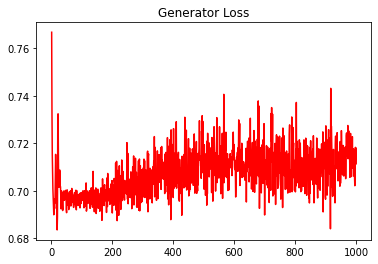

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.36468194365211637


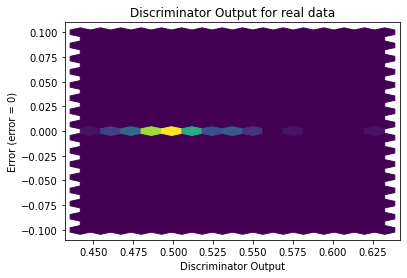

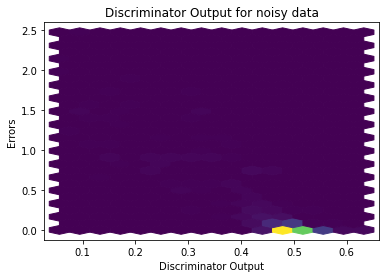

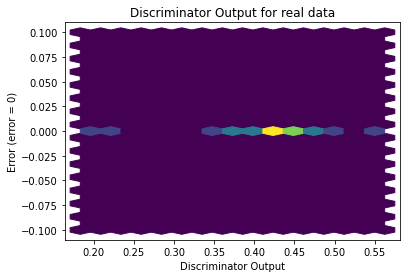

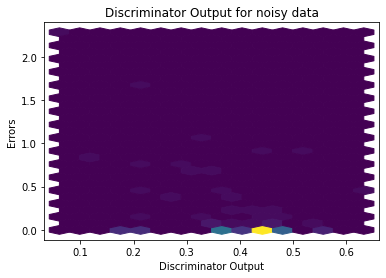

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6871]], requires_grad=True)
